In [1]:
import os
import torch
import numpy as np
from PIL import Image
import base64
import requests
# General packages
import pandas as pd

In [2]:
from IPython.display import Image as IImage

In [3]:
# pd.set_option('display.max_rows', None)

# d_path = '/raid/AISSEL/htest/datasets/ped_data/ped_ftest/all'
#before
df_b = pd.read_pickle(f'/home/test/ofa/test_before_trained_on_all_ped.pk')




In [4]:
df_b

,uniq_id,image_id,caption,topic_id,labels,image,topic2caption_sim,concept2caption_sim,topics,tag,ofa_caption,gt
0,167,167,Car on rural road vector Stock Photo,68,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.376758,0.212455,a,"{'passenger': 0, 'wheel': 1, 'vehicle': 1, 'wa...",a silhouette of a car parked in a field,wheel vehicle
1,184,184,Bus Only Lane Rendering Kuhio and Walina,112,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.392783,0.160691,a,"{'freight': 1, 'transportation': 1, 'traffic':...",a street with a bus and a white car on the road,freight transportation traffic transport tran...
2,187,187,Passenger boarding a bus on Bayshore,112,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.438588,0.197647,a,"{'freight': 1, 'transportation': 1, 'traffic':...",a person is getting on a bus at a bus stop,freight transportation traffic transport tran...
3,192,192,Passenger boarding a bus on Bayshore,112,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.438588,0.197647,a,"{'freight': 1, 'transportation': 1, 'traffic':...",a person is getting on a bus at a bus stop,freight transportation traffic transport tran...
4,209,209,Pedestrian Connections Congestion Strategy,112,,/9j/7gAOQWRvYmUAZAAAAAAA/9sAQwAIBgYHBgUIBwcHCQ...,0.612697,0.493012,a,"{'freight': 1, 'transportation': 1, 'traffic':...",a woman and a child in a wheelchair waiting fo...,freight transportation traffic transport cong...
...,...,...,...,...,...,...,...,...,...,...,...,...
618,1228,1228,Westown Commons picnic shelter front view,296,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.395052,0.217862,o,"{'scenic': 0, 'recreation': 1, 'wilderness': 0...",a gazebo with picnic tables in a park,recreation park area
619,1241,1241,Humboldt Alexander Von Park,296,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.415312,0.211162,o,"{'scenic': 1, 'recreation': 1, 'wilderness': 0...",a bridge over a river with a body of water,scenic recreation park area pedestrian
620,1259,1259,photo of trees and the fenceline at Mason Hill...,296,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.446961,0.234170,o,"{'scenic': 1, 'recreation': 1, 'wilderness': 0...",a tree in a field next to a fence,scenic recreation park area
621,1296,1296,Hogback Ridge Park,296,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.579372,0.235827,o,"{'scenic': 1, 'recreation': 1, 'wilderness': 0...",a person holding a camera on a pile of leaves,scenic recreation park area


In [5]:
def drop_nan(df):
#     print(df['gt'].isna().sum())
    df = df[df['gt'].notna()]
    df = df.reset_index(drop=True)
    return df

In [6]:
df_b = df_b.dropna()
df_b = df_b.reset_index(drop=True)
# tmp_df

In [7]:
print(len(df_b))


623


In [8]:
print(df_b.at[0, 'caption'])


Car on rural road vector Stock Photo


In [9]:
data_length = len(df_b)
data_length

623

In [10]:
d = [None] * data_length

In [11]:
def get_cap(idx):
    image_64_decode = base64.b64decode(df_b.at[idx,'image']) 
    image_result = open('test.jpg', 'wb')
    image_result.write(image_64_decode)
    wc = df_b.at[idx,'caption']
    gt = df_b.at[idx,'gt']
    return wc, gt

460


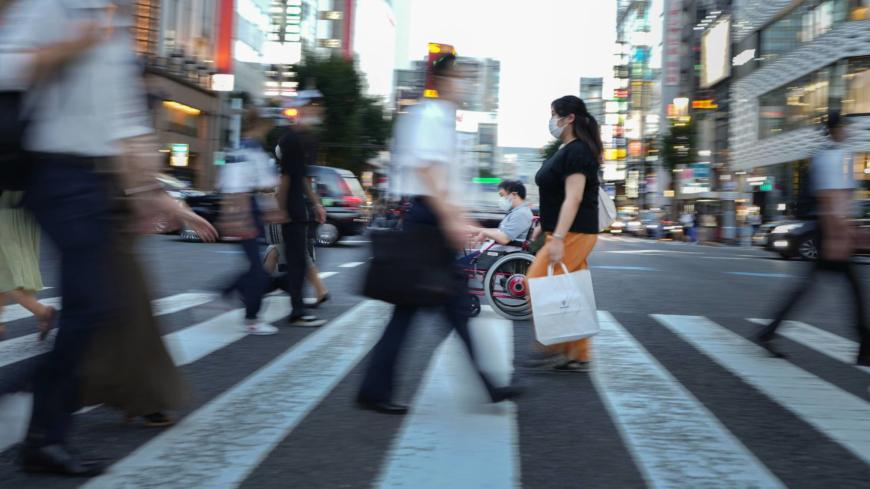

web caption: Disabled Japanese are often invisible Will Paralympics bring lasting light
detected topics:  disability wheelchair pedestrian
461


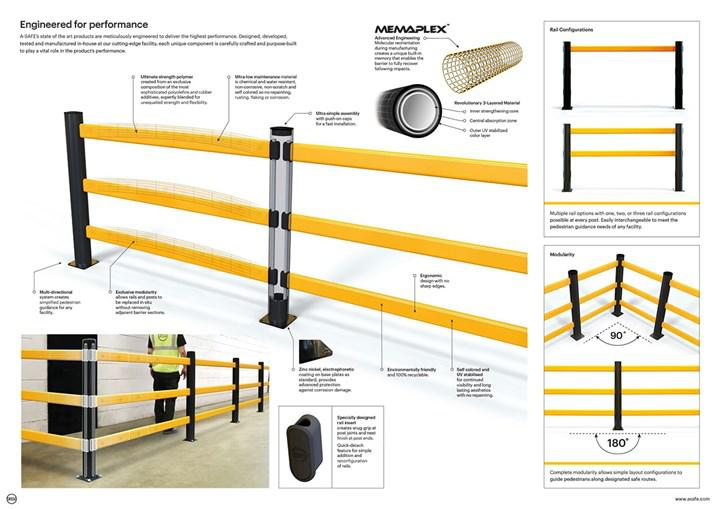

web caption: Eflex Pedestrian 3 Rail Guardrail USA WEB Min
detected topics:  guardrail bumper hazard rail pedestrian barrier protect safety
462


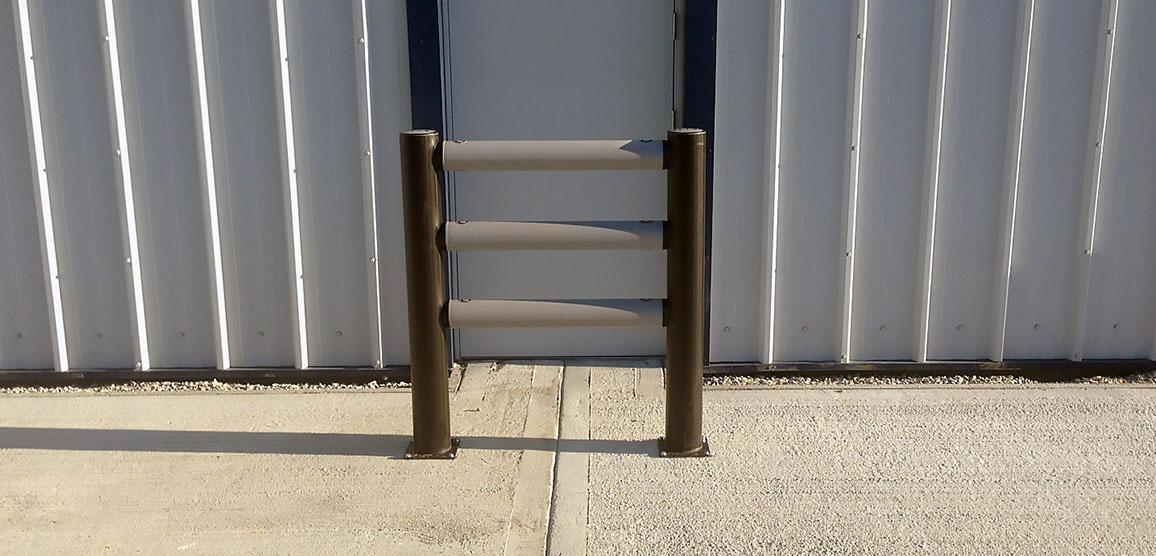

web caption: iFlex Pedestrian 3 Rail safety Guardrail Circular Rails at airport
detected topics:  guardrail bumper hazard rail barrier protect safety


In [12]:
s_ind = 460
e_ind = 463
for idx, row in df_b.iterrows():
    if idx >=s_ind and idx < e_ind:
        print(idx)
        wc, gt = get_cap(idx)
        display(IImage(filename='test.jpg', width = 300, height = 200))
        print(f'web caption: {wc}')
        print(f'detected topics: {gt}') 

In [13]:
d[0] = "A parked car in a remote area"
d[1] = "Two individuals ride bikes on the bus-only route, while a man pushes a wheelchair on side walk as others wait for the bus at the bus stop."
d[2] = "A bus stopped in the bus stop when a passenger is entering the bus"
d[3] ="A bus stopped in the bus stop when a passenger is entering the bus"
d[4] = "A pedestrian with wheelchair waiting in the road"
d[5] = "A road with vehicles"
d[6] = "A busy road with a lot of vehicles"
d[7] = "4 images of vehicles and crossings"
d[8] = "A very congested road full of vehicle and pedestrians"
d[9] = "A busy road with vehicles where pedestrians are crossing the road"
d[11] ="Some parked car in a city"
d[12] ="A bus with a few people around"
d[13] ="Some images of bus, train and bus stop"
d[14] ="A view of an old fashioned city"
d[15] ="A vehicle in a city road"
d[16] ="A vehicle and a road crossing"
d[17] ="An accident scene with people around"
d[18] ="An accident scene with people around"
d[19] ="A rail crossing"
d[20] ="An old town with a few vehicles and buildings"
d[21] ="Some people in the road in front of a builing"
d[22] ="View of a street"
d[23] ="A street of a town at night"
d[24] ="Bus depot"
d[25] ="Some sign images of Royal Street"
d[26] ="A tran in a road"
d[27] ="A quiet station"
d[28] ="A lot of people getting in a vehicle"
d[29] ="A train in a road"
d[30] ="A person getting in a shuttle"
d[31] ="A train station with a vehicle and some people "
d[32] ="People waiting to get into train"
d[33] ="Some people in a train station"
d[34] ="Inside view of a train"
d[35] ="Inside view of a vehicle with some handles where passengers can stand by holding them"
d[36] ="Train station where people getting into and getting out of the vechicle"
d[37] ="Inside view of a train with passengers"
d[38] ="train station with some people waiting outside"
d[39] ="People waiting in train station"
d[40] ="A driver driving a vehicle"
d[41] ="Inside view of an empty train"
d[42] ="An empty train station view"
d[43] ="An empty train station view"
d[44] ="People waiting in train station"
d[45] ="Inside view of a train with passengers"
d[46] ="A double decker bus"
d[47] ="Inside view of a train with passengers"
d[48] ="A city street view with vehicles and buildings"
d[49] ="Inside view of a train with passengers"
d[50] ="People in an escelator inside a station"
d[51] ="A train in a city with buidings"
d[52] ="A kid passing a rail crossing"
d[53] ="Top view of a city where roads are visible"
d[54] ="A kid passing a rail crossing"
d[55] ="A kid passing a rail crossing"
d[56] ="A modern bridge in a city"
d[57] ="A person crossing a bridge"
d[58] ="A bridge"
d[59] ="A station"
d[60] ="A station in Sydney"
d[61] ="A train station with several trains"
d[62] ="An inside view of a station"
d[63] ="A street with colorful buildings and roads"
d[64] ="Feet of a person in a railcrossing"
d[65] ="Inside view of a train without passenger"
d[66] ="Inside view of a vehicle with some handles where passengers can stand by holding them"
d[67] ="A train station behind a railing"
d[68] ="An empty train"
d[69] ="High angle view of railway tracks seen through chainlink fence"
d[70] ="A stair"
d[71] ="Pedestrian walkway sign"
d[72] ="2 images of sidewalk with grass"
d[73] ="An open manhole in a street with cover"
d[74] ="A closeup view of a road made with bricks"
d[75] = "A busy crowded city view"
d[76] ="A crowdy crosswalk"
d[77] ="Two children passing a crosswalk"
d[78] ="A busy road with a lot of vehicle"
d[79] ="A train in a city"
d[80] ="Inside view of a train"
d[81] ="Train in a rail road"
d[82] ="People in front of a shop"
d[83] ="Inside view of a train with passengers"
d[84] ="Some peope in a street"
d[85] ="Some parked car"
d[86] ="Some parked car in a street"
d[87] ="People waiting in a station"
d[88] ="A stair"
d[89] ="A stair"
d[90] ="A stair"
d[91] ="An entrance in a street"
d[92] ="An entrance of a station in a street"
d[93] ="Subway sign"
d[94] ="Train in a train station"
d[95] ="A train station in a city"
d[96] ="A street with a building"
d[97] ="A train station with multiple crossings"
d[98] ="A person waiting for a train in a train station"
d[99] ="Entry point of a train station"
d[100] ="People waiting in a bench indoor"
d[101] ="A sign saying Wall Street"
d[102] ="Crowdy Wall Street with a train in train station"
d[103] ="People in an escelator"
d[104] ="A person indoor"
d[105] ="A city view with people, building, street"
d[106] ="People crossing a bridge over a lake"
d[107] ="A crowdy street"
d[108] ="A river, bridge and skyline"
d[109] ="A woman inside a office with a desk"
d[110] ="A road with pedestrian and car"
d[111] ="A crowded crosswalk"
d[112] ="A street and a pedestrian not visible under umbrella"
d[113] ="A person playing a musician instrument in a crowded street"
d[114] ="A bridge over a lake"
d[115] ="A street with pedestrian and buildings with a cloudy sky"
d[116] ="A car in a street in a city"
d[117] ="A street in a city"
d[118] ="Pedestrian crossing street."
d[119] ="A crowded street"
d[120] ="A crowded street with people in crosswalk"
d[121] ="An animated advertisement of a ride"
d[122] ="A city with buildings and street"
d[123]="A city with buildings and street"
d[124] ="A city with buildings and street"
d[125] ="A crowded street with people in crosswalk"
d[126] ="A street"
d[127] ="Sitting arrangement with sheds in street"
d[128] ="Brick build street in a sea beach"
d[129] ="Top view of a modern city"
d[130] ="A stop sign in a road"
d[131] ="A brick built road"
d[132] ="A part of a street with tree"
d[133] ="A road divider sign"
d[134] ="A brick built road"
d[135] ="An illustration of different types of road, pavements with  meanings"
d[136] ="Road with yellow lines"
d[137] ="A city with buildings, road, trees and parked cars"
d[138] ="A city with buildings and crosswalks"
d[139] ="A crosswalk"
d[140] ="A part of a road with building and pedestrian"
d[141] ="A building and pavement"
d[142] ="A railing in a road with work zone cone"
d[143] ="A street, car and grass"
d[144] ="Country road"
d[145] ="Concrete road with a pedestrian"
d[146] ="A street, car and grass"
d[147] ="Concrete road"
d[148] ="Concrete road"
d[149] ="Concrete tiles"
d[150] ="A road with sand"
d[151] ="A concrete road"
d[152] ="A road with a partly visible crossc walk"
d[153] ="Pavement"
d[154] ="Country road"
d[155] ="Road design"
d[156] ="Road design"
d[157] ="Road with trees"
d[158] ="Road sign"
d[159] ="Road image with crosswalk"
d[160] ="Animated picture of children crossing road with mother in a crosswalk"
d[161] ="Stop sign"
d[162] ="Crosswalks with a pedestrian, car and some signs"
d[163] ="A road sign"
d[164] ="A person crossing a crosswalk with cars in the road"
d[165] ="Crosswalk"
d[166] ="People passing a crosswalk"
d[167] ="Illustration of people passing a crosswalk"
d[168] ="Animated picture of people passing crosswalk"
d[169] ="Traffic lights"
d[170] ="An illustration of crosswalk with signals"
d[171] ="An animated picture of a person helping a woman to cross a road"
d[172] ="4-way road design"
d[173] ="Animated road with a car and people with bicycles"
d[174] ="A traffic sign of pedestrians and bicyclists"
d[175] ="People crossing road in a crosswalk"
d[176] ="Some people and a dog crossing a crosswalk"
d[177] ="People crossing road in a crosswalk"
d[178] ="Traffic signal"
d[179] ="A notice in a road"
d[180] ="Pedestrial cross sign with 20 seconds left"
d[181] ="A road with crosswalks"
d[182] ="A road design"
d[183] ="A road design top view with an airplane"
d[184] ="Top view of a modern city infrastructure"
d[185] ="People crossing crosswalk"
d[186] ="A lake surrounded by trees"
d[187] ="Road, mountain view from a car"
d[188] ="Car got stuck in water"
d[189] ="Country road"
d[190] ="Road, mountain view from a car"
d[191] ="Car, mountain, road"
d[192] ="Road, mountain view from a car"
d[193] = "Road, mountain view from a car"
d[194] ="Street"
d[195] ="A crowded street"
d[196] ="Several crosswalks and street"
d[197] ="Steet with car and crosswalk"
d[198] ="Several crosswalks with pedestrians"
d[199] ="A pathway"
d[200] ="A foggy view of a tree"
d[201] ="Construction zone"
d[202] ="Brick built street"
d[203] ="A road sign for pedestrian"
d[204] ="Bicycle road sign"
d[205] ="Road with trees"
d[206] ="A road sign"
d[207] ="Road signs for pedestrians and bicycles"
d[208] ="A street and a sidewalk full with pedestrians"
d[209] ="A person in a road"
d[210] ="Country road with trees"
d[211] ="Road with trees"
d[212] ="Pedestrial road sign"
d[213] ="Crosswalk"
d[214] ="Pedestrial road sign"
d[215] ="Pedestrial road sign"
d[216] ="Pedestrial road sign"
d[217] ="Safety awareness sign for pedestrians"
d[218] ="Road"
d[219] ="Yield road sign"
d[220] ="A road sign"
d[221] ="A pedestrian road sign"
d[222] ="Road with arrows"
d[223] ="Pedestrian road sign"
d[224] ="Crosswalk"
d[225] ="Road cleaning"
d[226] ="Pedestrian not allowed sign"
d[227] ="Stop sign"
d[228] ="Several road signs"
d[229] ="School zone sign"
d[230] ="Watch for pedestrians sign"
d[231] ="Stop for pedestrian signs"
d[232] ="Stop sign marked by a person"
d[233] ="Children crossing a crossroad"
d[234] ="Road sign"
d[235] ="Road sign"
d[236] ="Several road signs"
d[237] ="Several road signs"
d[238] ="Several road signs"
d[239] ="Several road signs"
d[240] ="Road sign"
d[241] ="Road sign"
d[242] ="Traffic signal"
d[243] ="Road sign"
d[244] ="Stop sign in a street"
d[245] ="Road signs"
d[246] ="Road signs in a street"
d[247] ="Bicycle road sign"
d[248] ="Pedestrian road sign"
d[249] ="Several road signs"
d[250] ="Road sign for school children present"
d[251] ="Pedestrian stop sign"
d[252] ="Parking sign"
d[253] ="Downtown street"
d[254] ="Several road signs"
d[255] ="Pedestrian sign"
d[256] ="Road sign"
d[257] ="Crosswalk"
d[258] ="Crosswalk"
d[259] ="Road with stop sign"
d[260] = "A crosswalk"
d[261] = "An animated view of a street with car, crosswalk and buildings"
d[262] = "A stop sign for pedestrians"
d[263] = "A road with a signal for pedestrians"
d[264] = "A crosswalk"
d[265] = "A crosswalk"
d[266] = "A crosswalk"
d[267] = "An animated view of a pedestrian in a crosswalk"
d[268] = "A warning message to watch for blind spots"
d[269] = "Road signs"
d[270] = "Asian road with cars and other traditional vehicles"
d[271] = "People fighting to get in a bus"
d[272] = "A crowded asian street with a bus"
d[273] = "A night view of a street with cars"
d[274] = "Cars in a road"
d[275] = "People passing a crosswalk"
d[276] = "A full bus with people standing in the door in a street"
d[277] = "Top view of a road with bicycles"
d[278] = "A city with road and cars"
d[279] = "An animated view of a street in a city with cars and crosswalks"
d[280] = "A modern city with traffic" 
d[281] = "A two-way road with divider and cars"
d[282] = "A street in a city"
d[283] = "Bridge and street in a city"
d[284] = "Several view of streets" 
d[285] = "A road with pedestrian and cars"
d[286] = "A two-way road with divider and cars"
d[287] = "Design of a 4-way street"
d[288] = "Road with trees" 
d[289] = "A town with bridges and buildings"
d[290] = "A cloudy road with a bridge"
d[291] = "A street and a bridge in a town"
d[292] = "A sea beach with nearby buildings" 
d[293] = "A street with vehicles"
d[294] = "A street with cars in a city"
d[295] = "Highway exit"
d[296] = "A street with cars"
d[297] = "A street with cars"
d[298] = "A two-way road with divider and cars" 
d[299] = "A two-way road with divider and cars"
d[300] = "A two-way road with divider and cars"
d[301] ="A two-way road with divider and cars"
d[302] = "A city with parked cars and buildings"
d[303] = "A crowded street in a city with cars and buildings"
d[304] = "A bridge with railing"
d[305] = "Several bridges over a street"
d[306] = "A street with bridge and pedestrians"
d[307] = "A street in a city"
d[308] = " street with parked cars in roadside parking"
d[309] = "An animated view of a street with pedestrians in sidewalk and also cars"
d[310] = "A two-way road with divider and cars"
d[311] = "A two-way road with divider and cars"
d[312] = "A two-way road with divider and cars"
d[313] = "A pedestrian walking in the street surrounded by snows"
d[314] = "A busy town with cars and pedestrians crossing in the crosswalks"
d[315] = "A busy town with cars and pedestrians crossing in the crosswalks"
d[316] = "A bridge over water"
d[317] = "A river, bridge and skyline"
d[318] = "Chapter 16 of the driving manual book"
d[319] = "Road rules for junctions"
d[320] = "A page of a book explaining different types of stalkers"
d[321] = "A page of a book explaining gang stalking"
d[322] = "A page of a book explaining safe places"
d[323] = "A page of a book showing a case study about stalkers"
d[324] = "A page of a book showing a photo of stalkers caught by police and warning them"
d[325] = "Two police officers investigating a car incident"
d[326] = "Two police officers investinaging a scene outside a car"
d[327] = "Two police officers in a sea beach"
d[328] = "A partial view of an emergency vehicle"
d[329] = "A partial view of an ambulance"
d[330] = "People protesting in a street"
d[331] = "People protesting in a street"
d[332] = "An inside view of a bus with a passenger"
d[333] = "People protesting in the street"
d[334] = "People protesting in the street"
d[335] = "People protesting in the street"
d[336] = "A person in a field"
d[337] = "An empty road in a city"
d[338] = "A view with two pedestrians from a car"
d[339] = "People gathering in a street and performing something"
d[340] = "Some people in a field"
d[341] = "Two person in a field"
d[342] = "A street with a pedestrian"
d[343] = "Pedestrians in a city"
d[344] = "A cartoon"
d[345] = "A cartoon"
d[346] = "Mobile order app advertisement"
d[347] = "Disney poster advertisement"
d[348] = "Disney characters walkin in a street"
d[349] = "Disney land"
d[350] = "Some disney characters"
d[351] = "Some disney characters"
d[352] = "Crowd in Disneyland"
d[353] = "A disney character in sea beach"
d[354] = "A night view of an area"
d[355] = "Disney characnters in disney park"
d[356] = "Mickey Mouse animation"
d[357] = "People outside Disneyland"
d[358] = "Disneyland"
d[359] = "Disneyland"
d[360] = "Road"
d[361] = "Pedestrians crossing the crosswalk"
d[362] = "Pedestrians crossing the crosswalk"
d[363] = "Animated view of pedestrians crossing the crosswalk"
d[364] = "Different symbols of person"
d[365] = "Different symbols of person"
d[366] = "Different symbols of person"
d[367] = "Different symbols of person"
d[368] = "Different symbols of person"
d[369] = "Two pedestrians"
d[370] = "A person hit by an accident"
d[371] = "A person hit by an accident"
d[372] = "A person picking up a ball in front of a car in the road"
d[373] = "Crosswalks in a modern city"
d[374] = "Feet of a person crossing crosswalk"
d[375] = "Feet of several persons crossing crosswalk"
d[376] = "Feet of several persons crossing crosswalk"
d[377] = "Feet of several persons crossing crosswalk"
d[378] = "One person in red dress in a crown while all others in black"
d[379] = "Animated view of two pedestrians using mobile in a crosswalk in front of a car in the road"
d[380] = "Distance between pedestrian and car"
d[381] = "Pedestrian"
d[382] = "Statues in a street"
d[383] = "Statuss in a street"
d[384] = "A person sitting in a street"
d[385] = "A statue and pedestrians in a road"
d[386] = "A statue and pedestrians in a road"
d[387] = "Statuss in a street"
d[388] = "Statuss in a street"
d[389] = "A woman with an exercise instrument"
d[390] = "Explaining Ataxia and gait disturbances" 
d[391] = "A presentation slide of Ataxia and gait disturbances" 
d[392] = "Two persons holding hand while other one behind in a wheelchair is screaming" 
d[393] = "Two legs with machines" 
d[394] = "One nurse and one patient with masks" 
d[395] = "A woman in a wheelchair in a seabeach" 
d[396] = "A person in a wheelchair in a bridge surrounded by trees" 
d[397] = "Wheelchair, doctor, patient and other medical equipments" 
d[398] = "A person with disability using a wheelchair with baskets" 
d[399] = "A person with a wheelchair enjoying sunset" 
d[400] = "International day of person with disabilities symbol" 
d[401] = "A partially visible person in a wheelchair" 
d[402] = "Parking spot for person with disabilities" 
d[403] = "2 feet of a person" 
d[405] = "2 pedestrians with only feet visible" 
d[406] = "A family in a living room" 
d[407] = "One man and woman dancing" 
d[408] = "Feet of a person" 
d[409] = "A dancer girl" 
d[410] = "Feet of a man and woman dancing" 
d[411] = "Feet of a woman with high heel" 
d[412] = "Feet of a man and woman" 
d[413] = "Feet of several person" 
d[414] = "Drawing of feet of several person" 
d[415] =  "Drawing of leg movement of dances"
d[416] = "Drawing of feet of two person" 
d[417] = "Drawing of leg movement of dances"
d[418] = "Drawing of leg movement of dances" 
d[419] = "Leg movement of dances"
d[421] = "Feet of people"
d[422] = "Feet of people"
d[423] = "Feet of people"
d[424] = "Feet of people"
d[425] = "Feet of people"
d[426] = "Feet of people"
d[427] = "Feet of people"
d[428] = "A disabled pedestrian in a wheelchair about to cross a street"
d[429] = "Pralympic game poster"
d[430] = "Para Dance sports prize participant"
d[431] = "A device"
d[432] = "A person with wheelchair entering the driver seat of a car"
d[433] = "A person with wheelchair entering the driver seat of a car"
d[434] = "A partially visible person with wheelchair in a street"
d[435]= "A partially visible person with wheelchair in a street"
d[436] = "A person with a wheelchair entering a bus"
d[437] = "A pedestrian with a wheelchair crossing a street"
d[438] = "A person with a wheelchair with a ball in his hand"
d[439] = "A pedestrian with a wheel chair and a car in front of him"
d[440] = "A pedestrial with wheelchair crossing a crosswalk"
d[441] = "A pedestrial with wheelchair crossing a crosswalk"
d[442] = "Animated view of two disabled person with wheelchair playing with balls"
d[443] = "Animated view of two disabled person without leg participaing in running contest"
d[444] = "A disable athlete in a wheelchair assisted by another person"
d[445] = "5 disable athletes with different types of disabilities"
d[446] = "A pedestrian with a wheelchair crossing a crosswalk"
d[447] = "A pedestrian with a wheelchair crossing a street"
d[448] = "A pedestrian with a wheelchair crossing a street"
d[449] = "A person with wheelchair entering the driver seat of a car"
d[450] = "A pedestrian with a wheelchair"
d[451] = "A pedestrian with a wheelchair"
d[452] = "A pedestrian with a wheelchair"
d[453] = "A pedestrian with a wheelchair"
d[454] = "A pedestrian with a wheelchair crossing a crosswalk"
d[455] = "A pedestrian with a wheel chair and a car in front of him"
d[456] = "A pedestrian with a wheelchair waiting to cross the street"
d[457] = "A pedestrian with a wheelchair crossing the street in crosswalk"
d[458] = "A pedestrian with a wheelchair crossing the street with assistance of another person"
d[459] = "Pedestrians crossing in crosswalk"
d[460] = "Pedestrians crossing a crosswalk including pedestrian with a wheelchair"
d[461] = "Some railing equipments"
d[462] = "Pedestrian Rail safety Guardrail Circular Rails at airport"
d[463] = "Railing"
d[464] = "Railing"
d[465] = "Railing"
d[466] = "Railing with person"
d[467] = "Railing with person"
d[468] = "BIcyclist in a road"
d[469] = "Bicylists in a village road"
d[470] = "Bicycle lane"
d[471] = "2 bicyclists"
d[472] = "Bicyclists"
d[473] = "Parked bicycles in a street"
d[474] = "Animated rider standing with his bike"
d[475] = "Bicyclist"
d[476] = "Animated bicyclist"
d[477] = "Bicylist"
d[478] = "Woman with a stroller crossing a road"
d[479] = "Woman with a stroller in a park"
d[480] = "Woman with a stroller standing in the street"
d[481] = "Animated woman with a stroller standing in the street"
d[482] = "Woman with a stroller in front of a river"
d[483] = "A woman with a kid in a stroller and a dog in street"
d[484] = "A woman with a stroller in a street"
d[485] = "A woman with a stroller in a street"
d[486] = "A woman with a stroller crossing a street"
d[487] = "A woman with a stroller crossing a street"
d[488] = "A man and woman with a kid in a stroller in a sidewalk"
d[489] = "Baby with stroller sign"
d[490] = "A woman with a kid in stroller in front of a car"
d[491] = "An animated man with a stroller"
d[492] = "Two animated women with babies in stroller"
d[493] = "Woman with a kid in a stroller crossing a street"
d[494] = "A woman with a stroller walkin in a street"
d[495] = "stroller"
d[496] = "Two women with kids in stroller in a city"
d[497] = "Woman with a kid in a stroller"
d[498] = "Image of a woman with stroller"
d[499] = "A staller sign"
d[500] = "Illustration of a women with a baby in stroller"
d[501] = "A man, woman and a child with a stroller ahead in seabeach"
d[502] = "A man and a woman with a stroller in a park"
d[503] = "A park with bench and baby with stroller"
d[504] = "A woman with a baby in a stroller in grass"
d[505] = "A woman walking with 1 baby and another baby in stroller"
d[506] = "A sign of a stroller"
d[507] = "A woman with a mask with stroller"
d[508] = "A person walking with a baby in a stoller"
d[509] = "Illustration of people passing the crossway while cars waiting for them"
d[510] = "Illustration of a global planner"
d[511] = "Simulation of some people arrangement in different rooms"
d[512] = "Car accident manual"
d[513] = "Highway with cars and trees around"
d[514] = "A road with cars, pedestrians and police"
d[515] = "NYPD in street with car parked"
d[516] = "Illustration of cars and passengers in a street"
d[517] = "Car and people in city road"
d[518] = "Road with cars and trees around"
d[519] = "A research article on Porsche"
d[520] = "Night view of a city with a bridge and buildings"
d[521] = "Histograms of some statistics about homeless"
d[522] = "People gathering around a building"
d[523] = "People gathering in a parking lot around a car"
d[524] = "Architectural record handbook"
d[525] = "A commercial area with roof still under construction"
d[526] = "Opening of some event where people waiting with ribbon to cut"
d[527] = "A city view with buildings and cars"
d[528] ="A city view with buildings and cars"
d[529] ="A city view with buildings, pedestrians and cars"
d[530] = "Chicago city of architecture"
d[531] = "A city view with buildings"
d[532] = "A view of a city with buildings"
d[533] = "Illustration of a city"
d[534] = "An old city with bridge, buildings and pedestrians"
d[535] = "An old city with streets and buildings"
d[536] = "A city with high-rise buildings and greens"
d[537] = "City skyline with people enjoying outdoor"
d[538] = "A street in a city"
d[539] = "A lake in a city"
d[540] = "People enjoying outdoor in a city"
d[541] = "A city view with cars, buildings and pedestrians"
d[542] = "Top view of a downtown"
d[543] = "A river with boat"
d[544] = "A high-rise building"
d[545] = "A person walking in a sea shore"
d[546] = "A woman walking in a city"
d[547] = "A view of a street with pedestrian, car, bicycle"
d[548] = "Some people indoor"
d[549] = "People waiting outside in front of a building"
d[550] = "A city view with building"
d[551] = "A sculpture in front of a building"
d[552] = "Pulitzer breaking news"
d[553] = "Children in a difficult situation while one is crying and another one is placed inside a bucket"
d[554] = "People indoor"
d[555] = "Warehouse sale"
d[556] = "Pedestrians crossing a crosswalk"
d[557] = "Pedestrians crossing street"
d[558] = "Pedestrians walking in a street with car around them"
d[559] = "People walking and waiting in a commercial space" 
d[560] = "An illustrated person"
d[561] = "Insects"
d[562] = "A person walking in grass in front of a house"
d[563] = "Illustration of few people walking"
d[564] = "State law to yield for passengers and crossing panel rubber base"
d[565] = "Pedestrians walking in a street"
d[566] = "Two images of road with pedestrians and road with pedestrians and cars"
d[567] = "Street in front of a building"
d[568] = "A city with bridge and building"
d[569] = "People walking in front of CVS pharmacy"
d[570] = "A poster of zombie police of schenectady"
d[571] = "People indoor"
d[572] = "People waking in a street in a city"
d[573] = "Measurement of slope from street to sidewalk"
d[574] = "A trail surrounded by trees"
d[575] = "A trail with water and trees"
d[576] = "Null"
d[577] = "A trail surrounded by trees"
d[578] = "A trail surrounded by trees"
d[579] = "A trail surrounded by trees"
d[580] = "A trail surrounded by trees"
d[581] = "Bicyclists in a trail"
d[582] = "A bridge"
d[583] = "A footwalk with ligths"
d[584] = "Pedestrian sign"
d[585] = "A trail surrounded by trees"
d[586] = "Hiking spot with people"
d[587] = "A taril with mountain pedestrian and biker"
d[588] = "Mountain and water"
d[589] = "Mountain and water"
d[590] = "A baby in a trail"
d[591] = "One person standing in a beatuful hiking place"
d[592] = "A woman sitting in a mountain and enjoying"
d[593] = "One man and a woman in a hiking trail"
d[594] = "A place for outdoor activities where people are walking with their dog"
d[595] = "A street in a city with trees"
d[596] = "Riverside walk"
d[597] = "Bridge over a river and mountain nearby"
d[598] = "A walking trail"
d[599] = "People gathering outside"
d[600] ="Water park with kids"
d[601] ="People with a dog in front of a street painting"
d[602] ="Illustration of people walking in street"
d[603] ="Illustration of several cars in road"
d[604] ="Different road signs" 
d[605] ="Parking rate sign"
d[606] ="Parking sign"
d[607] ="Parking sign"
d[608] ="Cars parked in roadside parking"
d[609] ="Car quiet mode manual"
d[610] = "Parked cars"
d[611] = "Parked cars in a street"
d[612] = "Parked car in parking"
d[613] = "Parking time limit indicator"
d[614] = "Playground with kids with parents"
d[615] = "Park crowded with people"
d[616] = "Hikers hiking"
d[617] = "A person in a mountain"
d[618] = "Shed in a park"
d[619] = "A bridge over a lake"
d[620] = "A park"
d[621] = "Fallen leaves with food"
d[622] = "People in a playground"

In [14]:
df_b['h_caption'] = d

In [15]:
df_b = df_b.dropna()
df_b = df_b.reset_index(drop=True)
print(len(df_b))

620


In [16]:
df_b

,uniq_id,image_id,caption,topic_id,labels,image,topic2caption_sim,concept2caption_sim,topics,tag,ofa_caption,gt,h_caption
0,167,167,Car on rural road vector Stock Photo,68,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.376758,0.212455,a,"{'passenger': 0, 'wheel': 1, 'vehicle': 1, 'wa...",a silhouette of a car parked in a field,wheel vehicle,A parked car in a remote area
1,184,184,Bus Only Lane Rendering Kuhio and Walina,112,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.392783,0.160691,a,"{'freight': 1, 'transportation': 1, 'traffic':...",a street with a bus and a white car on the road,freight transportation traffic transport tran...,Two individuals ride bikes on the bus-only rou...
2,187,187,Passenger boarding a bus on Bayshore,112,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.438588,0.197647,a,"{'freight': 1, 'transportation': 1, 'traffic':...",a person is getting on a bus at a bus stop,freight transportation traffic transport tran...,A bus stopped in the bus stop when a passenger...
3,192,192,Passenger boarding a bus on Bayshore,112,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.438588,0.197647,a,"{'freight': 1, 'transportation': 1, 'traffic':...",a person is getting on a bus at a bus stop,freight transportation traffic transport tran...,A bus stopped in the bus stop when a passenger...
4,209,209,Pedestrian Connections Congestion Strategy,112,,/9j/7gAOQWRvYmUAZAAAAAAA/9sAQwAIBgYHBgUIBwcHCQ...,0.612697,0.493012,a,"{'freight': 1, 'transportation': 1, 'traffic':...",a woman and a child in a wheelchair waiting fo...,freight transportation traffic transport cong...,A pedestrian with wheelchair waiting in the road
...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,1228,1228,Westown Commons picnic shelter front view,296,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.395052,0.217862,o,"{'scenic': 0, 'recreation': 1, 'wilderness': 0...",a gazebo with picnic tables in a park,recreation park area,Shed in a park
616,1241,1241,Humboldt Alexander Von Park,296,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.415312,0.211162,o,"{'scenic': 1, 'recreation': 1, 'wilderness': 0...",a bridge over a river with a body of water,scenic recreation park area pedestrian,A bridge over a lake
617,1259,1259,photo of trees and the fenceline at Mason Hill...,296,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.446961,0.234170,o,"{'scenic': 1, 'recreation': 1, 'wilderness': 0...",a tree in a field next to a fence,scenic recreation park area,A park
618,1296,1296,Hogback Ridge Park,296,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.579372,0.235827,o,"{'scenic': 1, 'recreation': 1, 'wilderness': 0...",a person holding a camera on a pile of leaves,scenic recreation park area,Fallen leaves with food


In [17]:
df_b.to_pickle(f'pd_base.pk')